/home/alex/nn_venv/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/alex/nn_venv/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/alex/nn_venv/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/alex/nn_venv/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:519: Futu

Loading "SmallTinyV3" model

Loading weights best/TSD_Small_YOLOv3_Tiny_SmallTinyV3_416x416_t2_ep171-val_loss3.178-best_mAP0.743.h5
Time: 1762.629 [ms] / FPS: 5.7


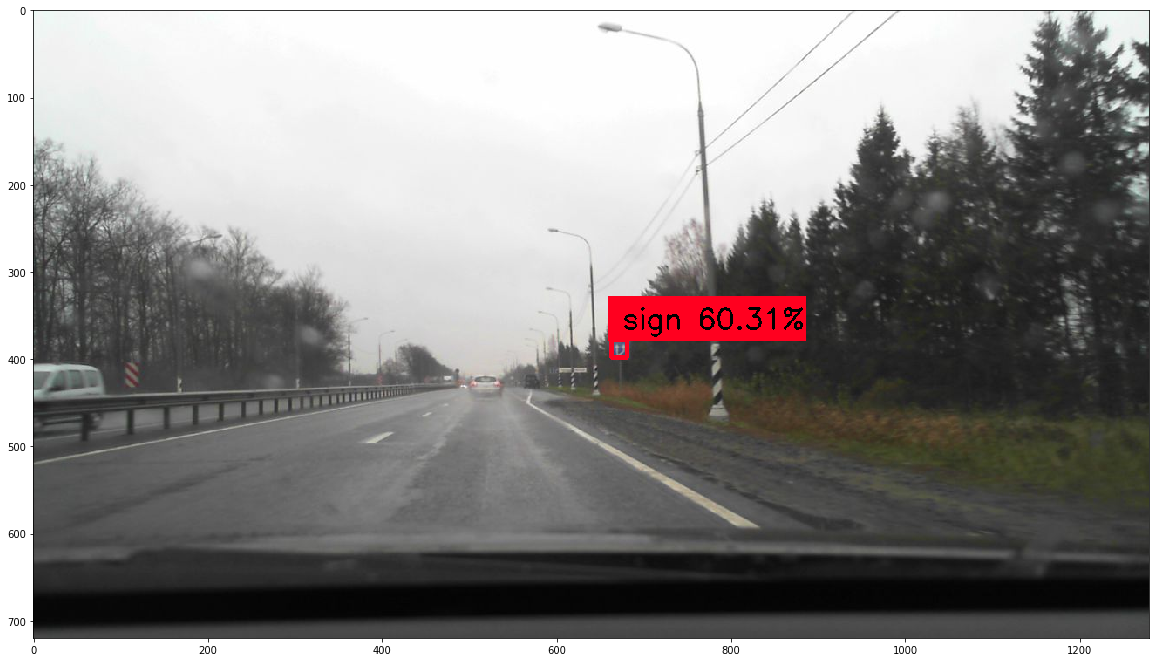

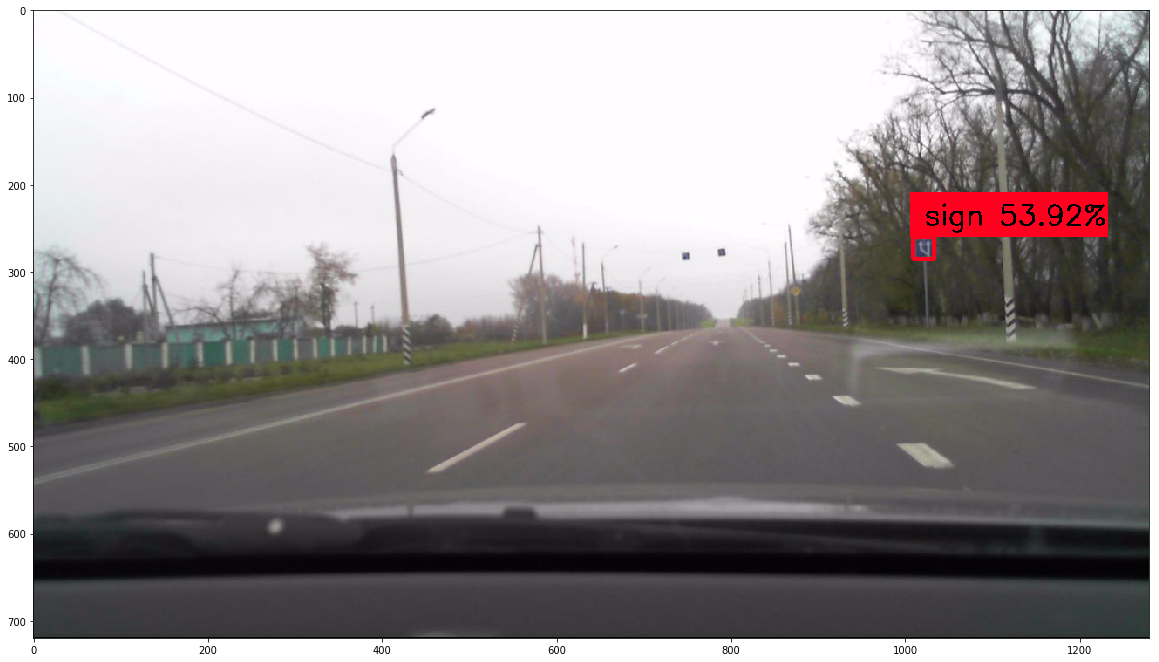

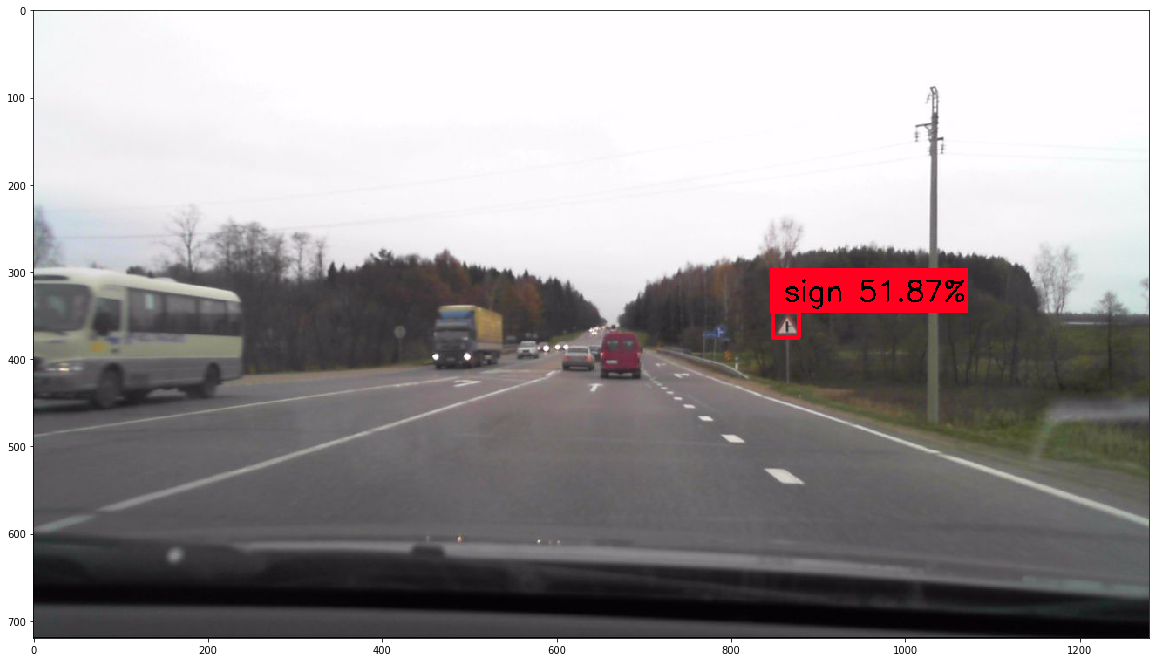

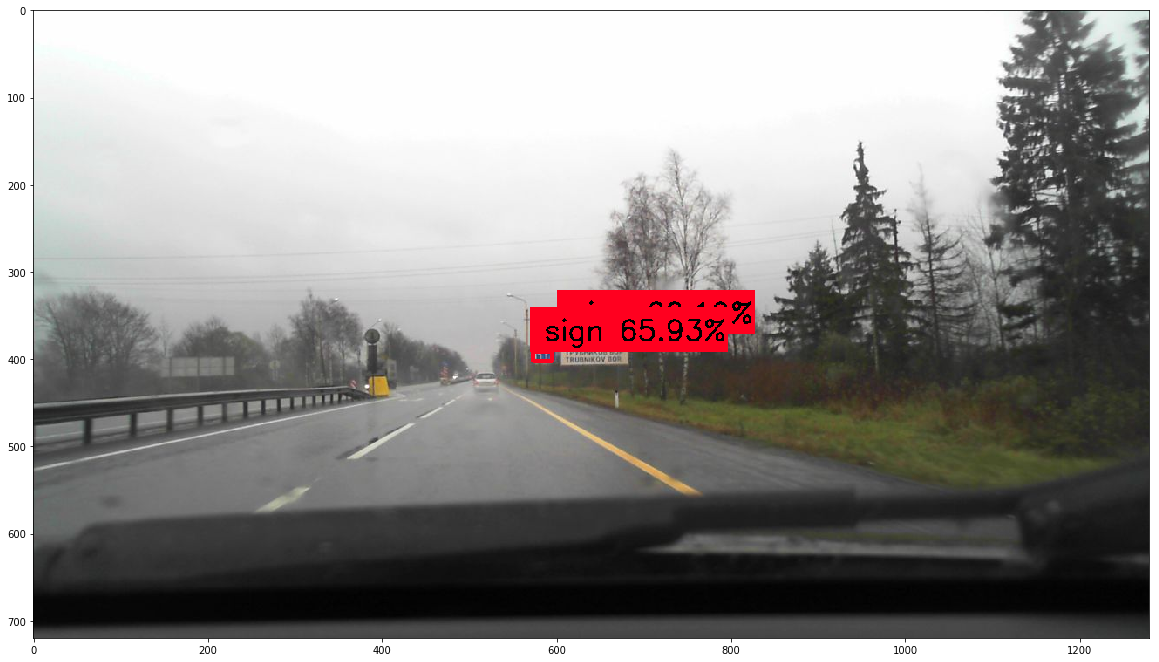

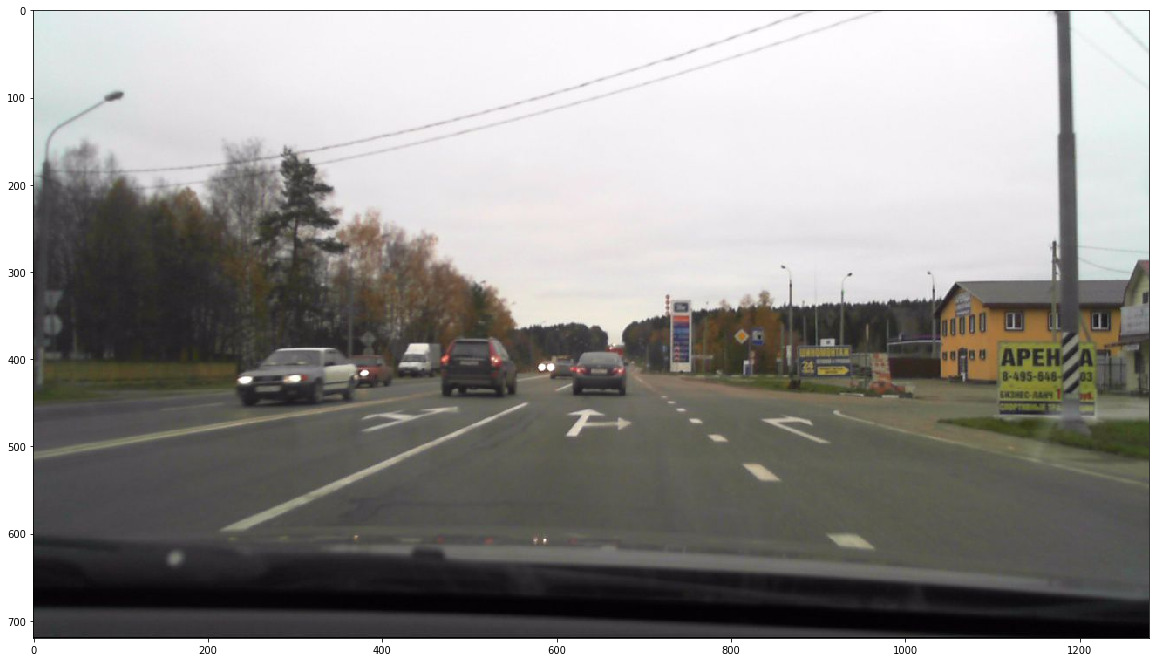

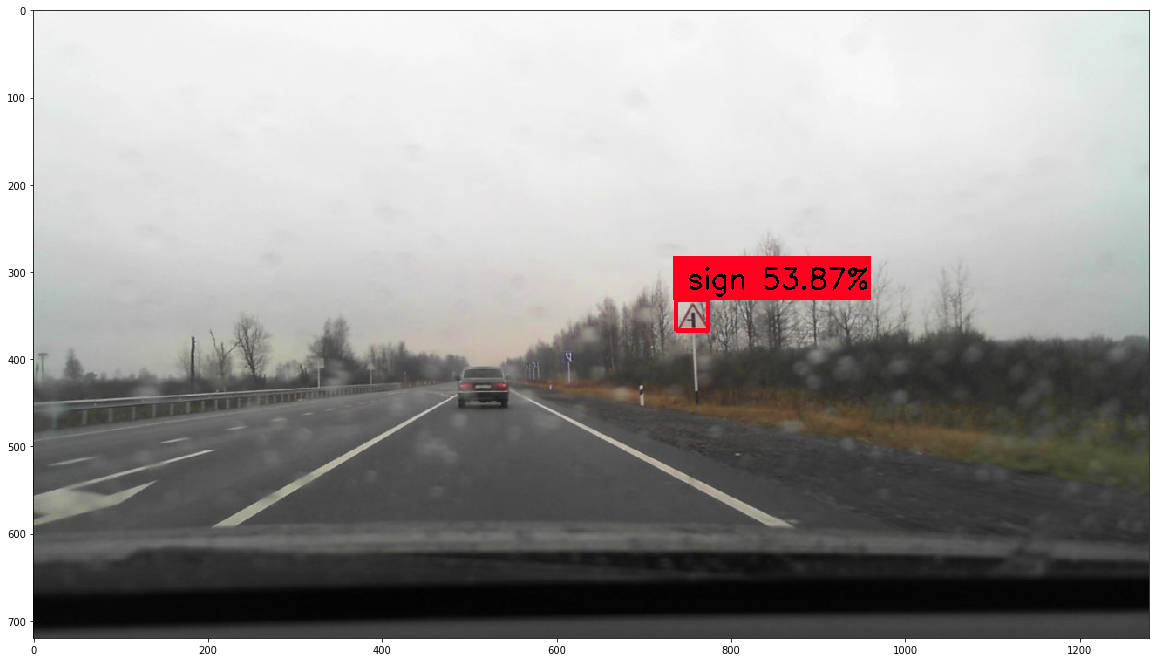

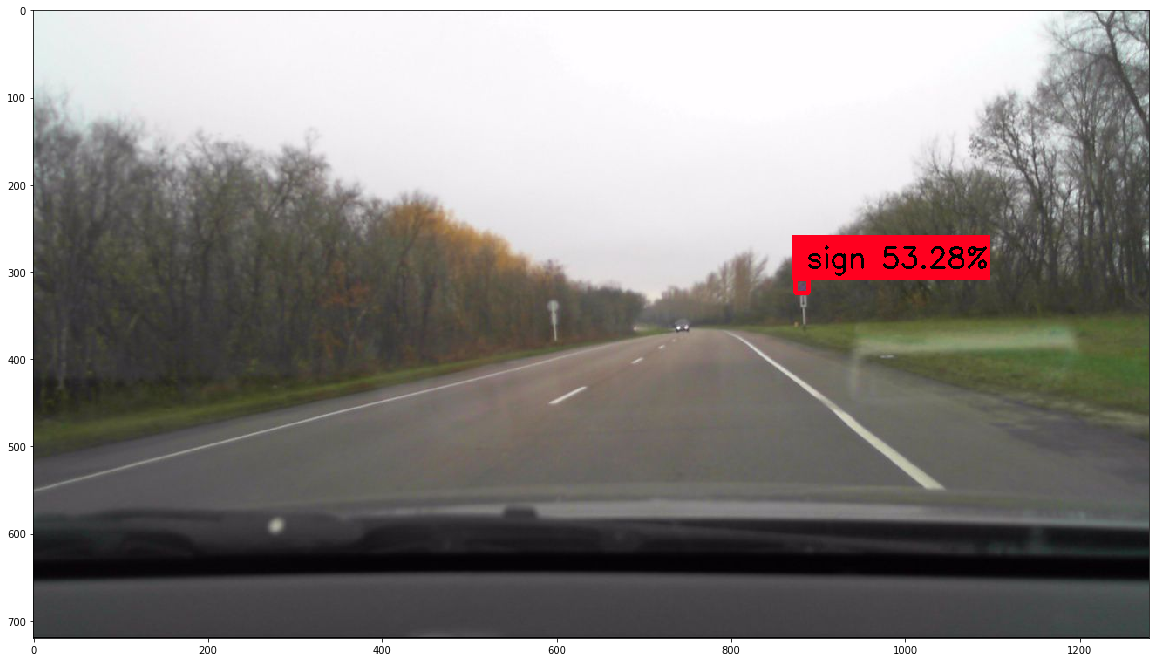

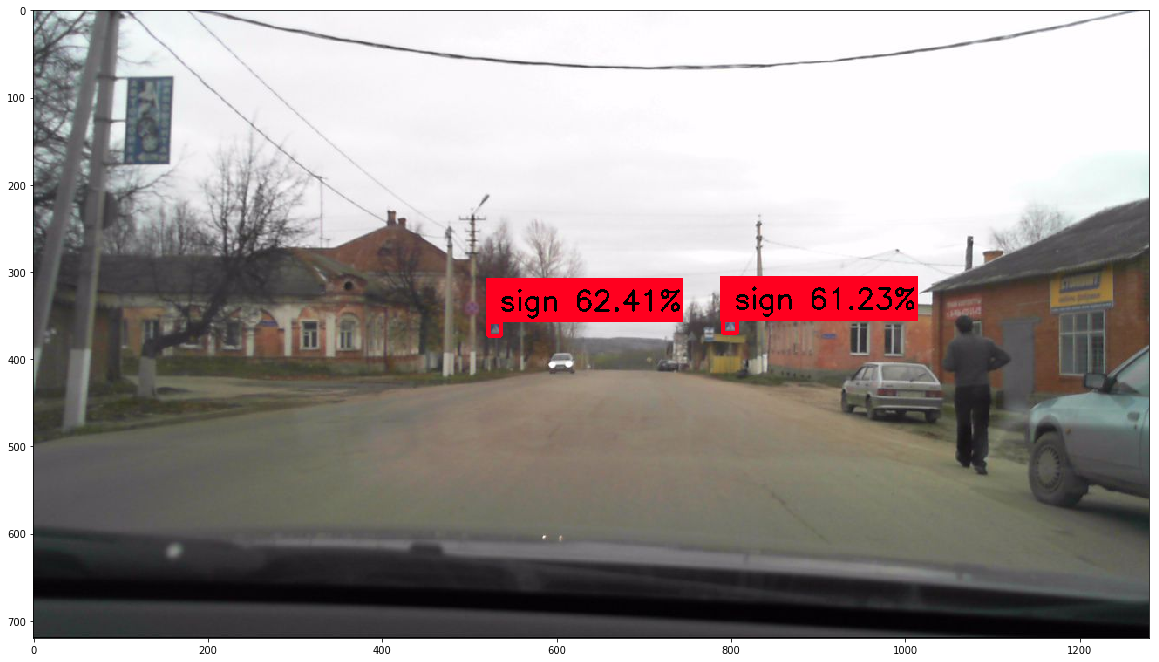

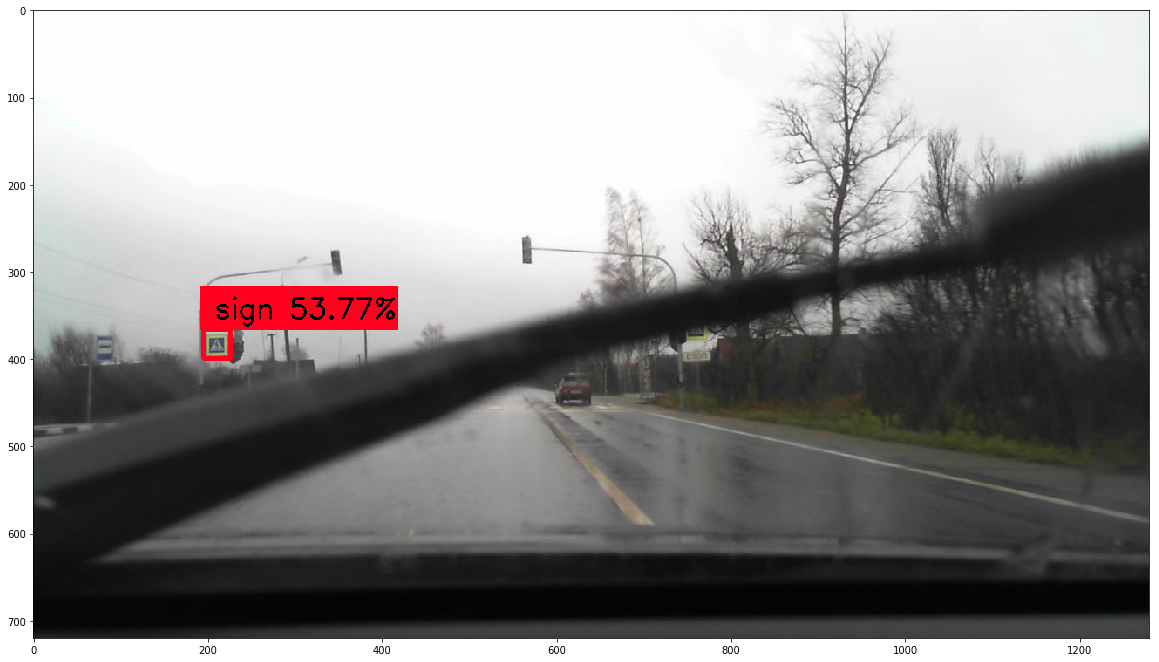

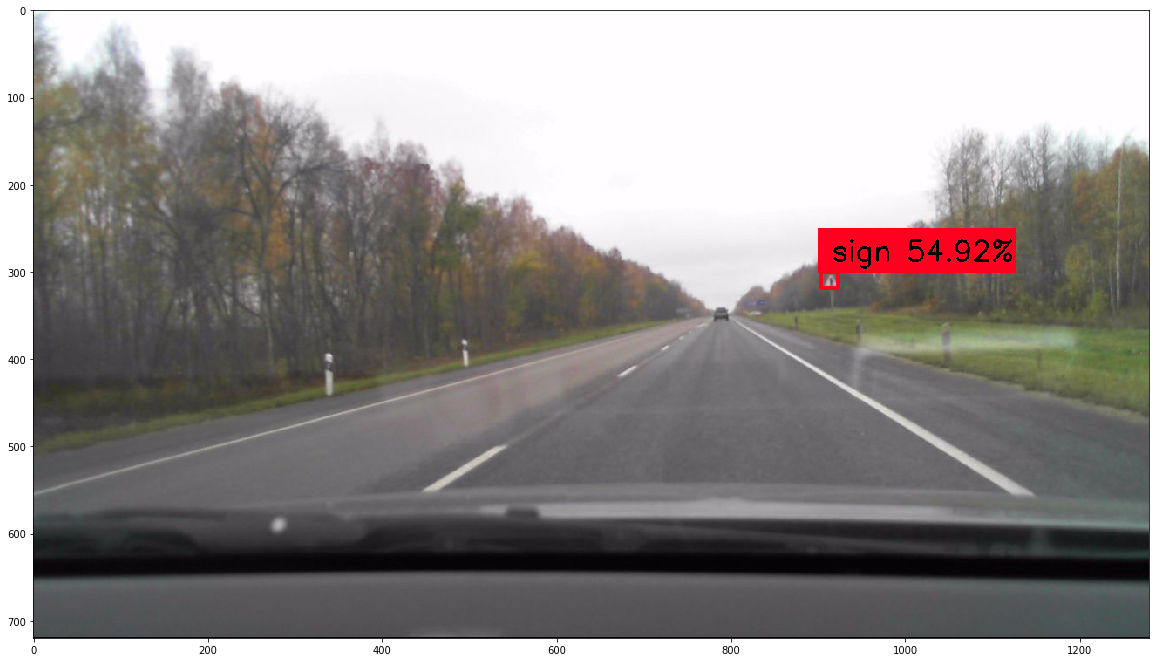

In [1]:
import time
import cv2
import argparse
from _common import utils
import json
import yolo
from _common.bbox import draw_boxes
from tensorflow.python.keras.models import load_model

import matplotlib.pyplot as plt
import cv2
import numpy as np
%matplotlib inline

config_path = 'cfgs/small-tiny-v3-tiles.json'
weights_path = 'best/TSD_Small_YOLOv3_Tiny_SmallTinyV3_416x416_t2_ep171-val_loss3.178-best_mAP0.743.h5'

with open(config_path) as config_buffer:    
    config = json.load(config_buffer)

input_path = config['eval']['image_folder'][0]
input_path = config['eval']['image_folder'][0]

labels = ['sign']
anchors = config['model']['anchors']

net_h, net_w = config['model']['infer_shape']
obj_thresh, nms_thresh = 0.5, 0.45

config['model']['labels'] = labels
yolo_model = yolo.YOLO_Model(
    config['model']
)

if weights_path:
    yolo_model.load_weights(weights_path)

data_generator = utils.data_generator(input_path, shuffle=True, cnt_limit=10)

full_time = 0
processing_cnt = 0
skip = 0

def cv_imshow(cv_img):
    cv_img = cv_img.astype(np.uint8)
    cv_img = cv2.cvtColor(cv_img, cv2.COLOR_BGR2RGB)
    plt.imshow(cv_img)

for type, image_src in data_generator:
    
    image = image_src.copy()
    
    start = time.time()

    boxes = yolo_model.infer_image(image)
    
    full_time += time.time() - start
    processing_cnt += 1

    draw_boxes(image, boxes, labels, obj_thresh) 

    if skip or type == utils.DATA_GEN_SRC_VIDEO:
        show_delay = 1
    else:
        show_delay = 0

    plt.figure(figsize=(20,20))
    cv_imshow(image)

print("Time: %.3f [ms] / FPS: %.1f" % (full_time * 1000, processing_cnt / full_time))